In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader.data as pdrd
from datetime import datetime

In [2]:
#collect data from Yahoo
def collectdata(tickers, start: datetime, end: datetime, data_source, to_csv: bool = True) -> pd.DataFrame:
    prices = []
    for ticker in tickers:
        adj_close = pdrd.DataReader(name=ticker, start=start, end=end, data_source=data_source)[['Adj Close']]
        adj_close.columns = [ticker]
        prices.append(adj_close)
    df_prices = pd.concat(prices, axis=1)
    df_prices = df_prices.reset_index()

    # output csv
    if to_csv:
        path = 'sklearn projects' + datetime.now().strftime('%y-%m-%d_%H%M%S') + '.csv'
        df_prices.to_csv(path, index = True, header=True)
    return df_prices
df_prices = collectdata(tickers=['GOOG', 'MSFT', 'AMZN', 'AAPL', 'NFLX'], 
                        start=datetime(2020,1,2), 
                        end=datetime(2020,12,31), 
                        data_source = 'yahoo')

In [3]:
df_nf = df_prices[['Date','NFLX']]

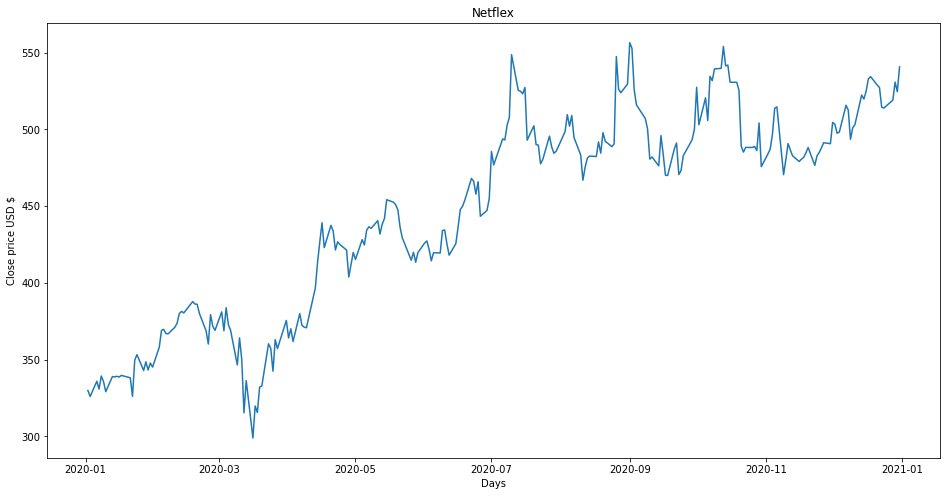

In [4]:
plt.figure(figsize = (16,8))
plt.title('Netflex')
plt.xlabel('Days')
plt.ylabel('Close price USD $')
plt.plot(df_nf['Date'], df_nf['NFLX'])
plt.show()

In [5]:
# Creat a variable to predict 'x' days out into the future

future_days = 25
df_nf['Prediction'] = df_nf['NFLX'].shift(-future_days)
df_nf

<ipython-input-5-f6d78319aab6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nf['Prediction'] = df_nf['NFLX'].shift(-future_days)


,Date,NFLX,Prediction
0,2020-01-02,329.809998,366.769989
1,2020-01-03,325.899994,371.070007
2,2020-01-06,335.829987,373.690002
3,2020-01-07,330.750000,380.010010
4,2020-01-08,339.260010,381.399994
...,...,...,...
248,2020-12-24,513.969971,NaN
249,2020-12-28,519.119995,NaN
250,2020-12-29,530.869995,NaN
251,2020-12-30,524.590027,NaN


In [6]:
# Get the last 'x' rows data
# df_future = df_nf['NFLX'].tail(future_days)
# df_future
# df_nf = df_nf.dropna()
X = np.array(df_nf.drop(['Date', 'Prediction'], 1))[:-future_days]
X

array([[329.80999756],
       [325.8999939 ],
       [335.82998657],
       [330.75      ],
       [339.26000977],
       [335.66000366],
       [329.04998779],
       [338.92001343],
       [338.69000244],
       [339.07000732],
       [338.61999512],
       [339.67001343],
       [338.10998535],
       [326.        ],
       [349.6000061 ],
       [353.16000366],
       [342.88000488],
       [348.51998901],
       [343.16000366],
       [347.73999023],
       [345.08999634],
       [358.        ],
       [369.01000977],
       [369.67001343],
       [366.95001221],
       [366.76998901],
       [371.07000732],
       [373.69000244],
       [380.01000977],
       [381.3999939 ],
       [380.3999939 ],
       [387.77999878],
       [386.19000244],
       [386.        ],
       [380.07000732],
       [368.70001221],
       [360.08999634],
       [379.23999023],
       [371.70999146],
       [369.02999878],
       [381.04998779],
       [368.76998901],
       [383.79000854],
       [372

In [7]:
y = np.array(df_nf['Prediction'])[:-future_days]
y

array([366.76998901, 371.07000732, 373.69000244, 380.01000977,
       381.3999939 , 380.3999939 , 387.77999878, 386.19000244,
       386.        , 380.07000732, 368.70001221, 360.08999634,
       379.23999023, 371.70999146, 369.02999878, 381.04998779,
       368.76998901, 383.79000854, 372.77999878, 368.97000122,
       346.48999023, 364.13000488, 349.92001343, 315.25      ,
       336.29998779, 298.83999634, 319.75      , 315.47000122,
       332.02999878, 332.82998657, 360.26998901, 357.32000732,
       342.39001465, 362.98999023, 357.11999512, 370.95999146,
       375.5       , 364.07998657, 370.07998657, 361.76000977,
       379.95999146, 372.27999878, 371.11999512, 370.72000122,
       396.72000122, 413.54998779, 426.75      , 439.17001343,
       422.95999146, 437.48999023, 433.82998657, 421.42001343,
       426.70001221, 424.98999023, 421.38000488, 403.82998657,
       411.89001465, 419.8500061 , 415.26998901, 428.1499939 ,
       424.67999268, 434.26000977, 436.52999878, 435.54

In [8]:
# split the data into 70% training and 25% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
# Creat the models
# Creat the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Creat linear regression model
Ir = LinearRegression().fit(x_train, y_train)

# Get the last 'x' rows data
x_future = df_nf.drop(['Date', 'Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[489.04998779],
       [485.23001099],
       [488.27999878],
       [488.23999023],
       [488.92999268],
       [486.23999023],
       [504.20999146],
       [475.73999023],
       [484.11999512],
       [487.22000122],
       [496.95001221],
       [513.76000977],
       [514.72998047],
       [470.5       ],
       [480.23999023],
       [490.76000977],
       [486.76998901],
       [482.83999634],
       [479.1000061 ],
       [480.63000488],
       [481.79000854],
       [484.67001343],
       [488.23999023],
       [476.61999512],
       [482.88000488]])

<ipython-input-10-890d614fb6b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


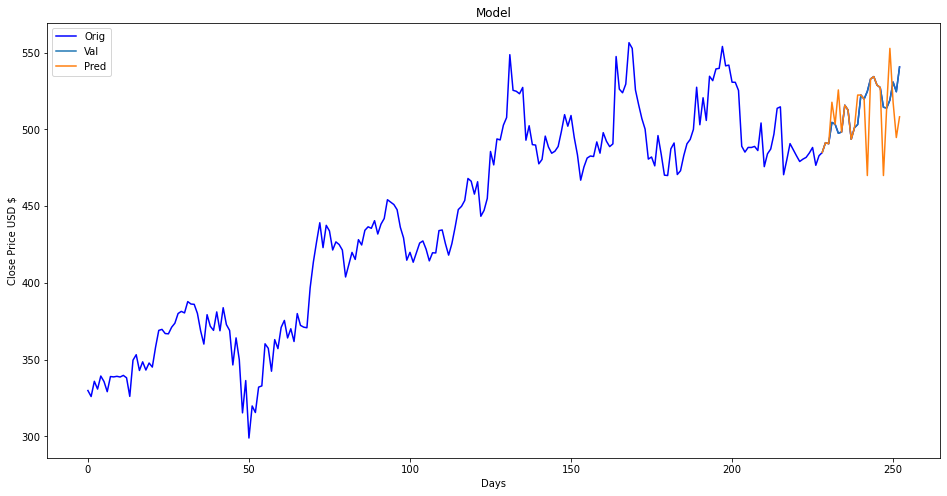

In [10]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)

#Show the model linear agression prediction
Ir_prediction = Ir.predict(x_future)

# Visualize the data
predictions = tree_prediction

valid = df_nf[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df_nf['NFLX'], color = 'blue')
plt.plot(valid[['NFLX', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

<ipython-input-11-5514661b9153>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


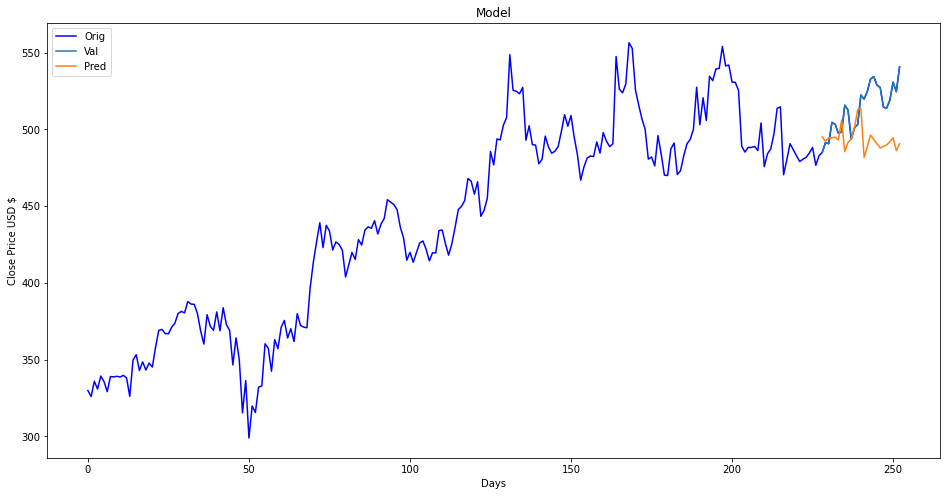

In [11]:
# Visualize the data
predictions = Ir_prediction

valid = df_nf[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df_nf['NFLX'], color = 'blue')
plt.plot(valid[['NFLX', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])